<a href="https://colab.research.google.com/github/aabadri/deep/blob/master/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import tensorflow as tf
import pandas as pd

# Classification

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist
X_train, y_train, X_valid, y_valid = X_train[:-5000], y_train[:-5000], X_train[-5000:], y_train[-5000:]

In [7]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

In [21]:
y_train[0]

9

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
tf.random.set_seed(42)
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input([28, 28]),
        tf.keras.layers.Flatten(name="flatten"),
        tf.keras.layers.Dense(300, activation="relu",name="hidden1"),
        tf.keras.layers.Dense(100, activation=tf.keras.activations.relu, name="hidden2"),
        tf.keras.layers.Dense(10, activation="softmax", name="output"),
    ]
)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 300)               235500    
                                                                 
 hidden2 (Dense)             (None, 100)               30100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
print(model.layers)
print(model.layers[2].name)
print(model.layers[2].get_weights())

[<keras.src.layers.reshaping.flatten.Flatten object at 0x7a8e5a593df0>, <keras.src.layers.core.dense.Dense object at 0x7a8e5a5916c0>, <keras.src.layers.core.dense.Dense object at 0x7a8e5d1c0430>, <keras.src.layers.core.dense.Dense object at 0x7a8e5d1c29e0>]
hidden2
[array([[ 0.03781457, -0.03183764,  0.07715686, ...,  0.0248028 ,
        -0.03976643, -0.09968002],
       [-0.00748515,  0.11331322, -0.05844781, ..., -0.07963109,
         0.06343441, -0.09867699],
       [ 0.00373929, -0.10192552,  0.102719  , ..., -0.02698711,
        -0.10891108,  0.02650113],
       ...,
       [-0.0453606 , -0.06153561, -0.08530284, ..., -0.11640266,
         0.05105329,  0.10429112],
       [ 0.00894553,  0.01690943,  0.10189378, ..., -0.10844254,
         0.09502266, -0.08328091],
       [-0.07540357,  0.06610743,  0.00674071, ...,  0.0257444 ,
        -0.01443905, -0.08250138]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.

In [23]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics = [tf.keras.metrics.sparse_categorical_accuracy]
)

In [24]:
history = model.fit(
    X_train, y_train, epochs=30, validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7332 - sparse_categorical_accuracy: 0.7595 - val_loss: 0.4999 - val_sparse_categorical_accuracy: 0.8296
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4889 - sparse_categorical_accuracy: 0.8317 - val_loss: 0.4482 - val_sparse_categorical_accuracy: 0.8388
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4410 - sparse_categorical_accuracy: 0.8465 - val_loss: 0.4140 - val_sparse_categorical_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4143 - sparse_categorical_accuracy: 0.8545 - val_loss: 0.3937 - val_sparse_categorical_accuracy: 0.8558
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3940 - sparse_categorical_accuracy: 0.8615 - val_loss: 0.4017 - val_sparse_categorical_accuracy: 0.8592
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3788 - spars

<Axes: xlabel='Epoch'>

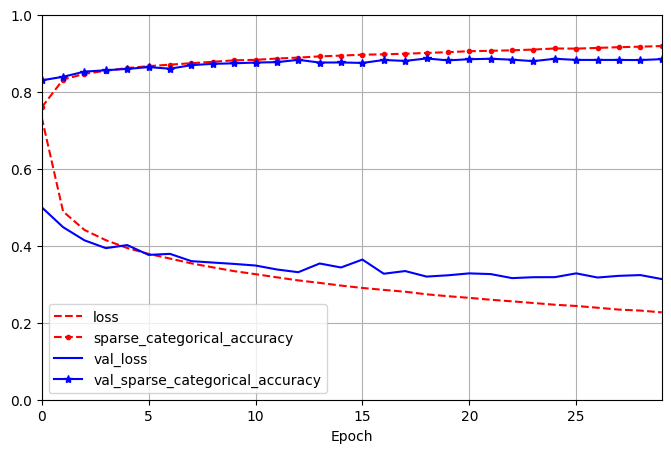

In [29]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3316 - sparse_categorical_accuracy: 0.8811


[0.3316119909286499, 0.8810999989509583]

In [38]:
model.predict(X_test[0:1]).round(2)

1/1 [==============================] - 0s 22ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.99]],
      dtype=float32)

In [44]:
model.predict(X_test[0:3]).round(2).argmax(axis=-1), y_test[:3]

1/1 [==============================] - 0s 22ms/step


(array([9, 2, 1]), array([9, 2, 1], dtype=uint8))

# Regression

In [46]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [47]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [49]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.8537 - root_mean_squared_error: 0.9240 - val_loss: 0.5181 - val_root_mean_squared_error: 0.7198
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3822 - root_mean_squared_error: 0.6182 - val_loss: 0.6394 - val_root_mean_squared_error: 0.7996
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3524 - root_mean_squared_error: 0.5936 - val_loss: 0.3174 - val_root_mean_squared_error: 0.5634
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3370 - root_mean_squared_error: 0.5805 - val_loss: 0.3853 - val_root_mean_squared_error: 0.6207
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3243 - root_mean_squared_error: 0.5695 - val_loss: 0.5140 - val_root_mean_squared_error: 0.7169
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3192 - root_mean_squared_error: 0.5649 - val_loss: 0.4268 - val_

In [51]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
model.predict(X_test[:3]), y_test[:3]

1/1 [==============================] - 0s 31ms/step


(array([[0.5019194],
        [1.2287937],
        [5.146706 ]], dtype=float32),
 array([0.477  , 0.458  , 5.00001]))